In [19]:
from qiskit import QuantumCircuit, transpile
from itertools import product
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.visualization import *
from scipy.optimize import minimize
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

token = '400620de6b57315d68a2003e358286d832e8fe469e03ab58b4ebc2baf3482e04996c54dccf41d705226f91d89d2ced5b7510d6f28eec6336e9e80f8f5685b9f3'
shots = 10_000


In [7]:
# Note: a depth n/2 does not seem possible on a linearly connected quantum computer
def makeghz(n):
    qc = QuantumCircuit(n,n)
    qc.h(0)
    qc.cx(0, int(np.floor(n/2)))
    for i in range(1, int(np.floor(n/2))):
        qc.cx(i-1, i)
    for i in range(int(np.floor(n/2))+1,n):
        qc.cx(i-1,i)
    return qc


In [31]:
def measurexstab(qc):
    n = len(qc.qubits)
    qc.barrier(range(n))
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.measure(i,i)
    return qc

In [ ]:
def measurezstab(qc,i):
    n = len(qc)
    qc.measure(i,i)
    qc.measure(i-1,i-1)
    return qc

In [58]:
def find_ev(results):
    numplus = 0
    for name, counts in results.items():
        parity = 0
        for letter in name:
            if letter == "1":
                parity += 1
        if parity % 2 == 0:
            numplus += counts
    return (2*numplus/shots-1)

-0.007600000000000051
{'0010': 648, '1010': 645, '0000': 606, '0011': 620, '0111': 614, '1011': 602, '1100': 650, '0100': 640, '1001': 608, '0101': 616, '1110': 659, '1101': 606, '1000': 620, '0110': 603, '1111': 614, '0001': 649}


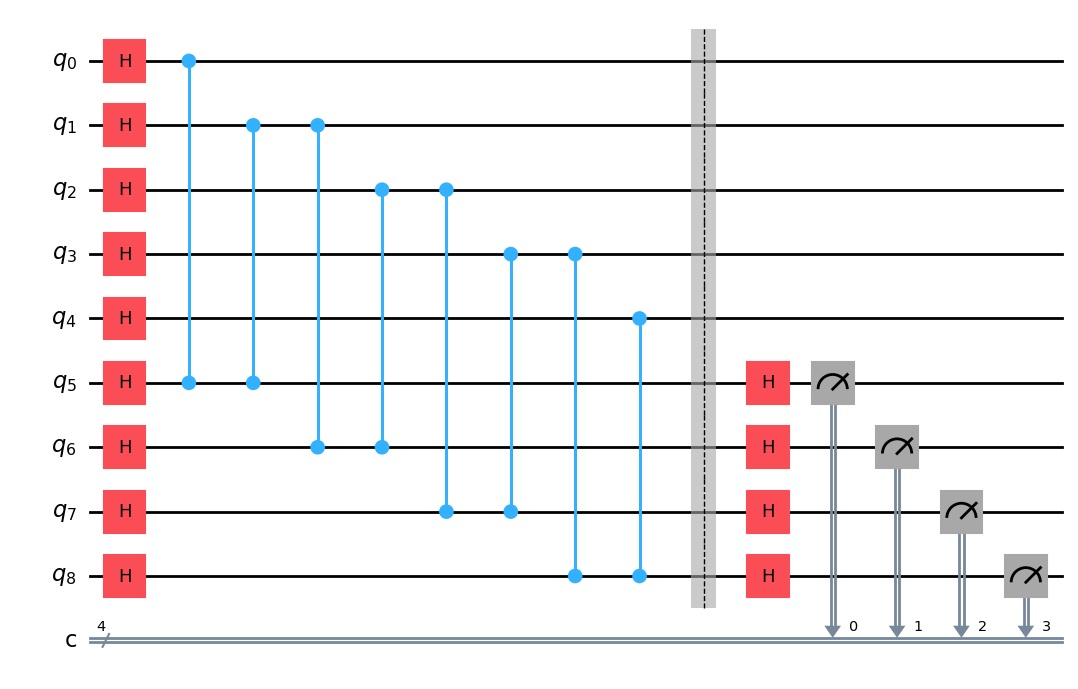

In [84]:
def genancillacirc(n):
    qc = QuantumCircuit(2*n-1, n-1)
    for i in range(2*n-1):
        qc.h(i)
    for i in range(n, 2*n-1):
        qc.cz(i-n, i)
        qc.cz(i-n+1, i)
    qc.barrier()
    for i in range(n, 2*n-1):
        qc.h(i)
        qc.measure(i,i-n)
    return qc


# a)

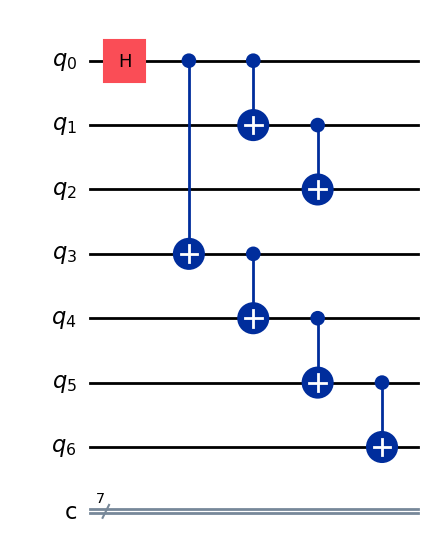

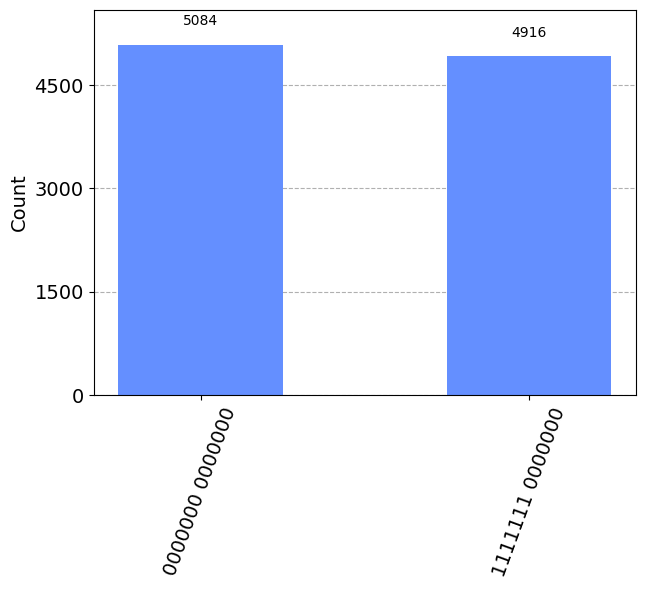

In [85]:
qc = makeghz(7)
display(qc.draw(output='mpl'))
qc.measure_all()
results = AerSimulator(method="statevector", shots=shots).run(qc).result().get_counts(qc)

plot_histogram(results)


In [60]:
qcx = measurexstab(makeghz(3))
qcx.z(0)
resultsx = AerSimulator(method="statevector", shots=shots).run(qcx).result().get_counts(qcx)
# plot_histogram(resultsz)
print(resultsx)
print(find_ev(resultsx))


    
    

{'101': 2533, '110': 2461, '011': 2529, '000': 2477}
1.0


In [66]:
n = 10
for i in range(2, n):
    qcz = measurezstab(makeghz(n))
    resultsz = AerSimulator(method="statevector", shots=shots).run(qcz).result().get_counts(qcz)
    print(f"Expectation value of S{i} is: ", find_ev(resultsz))

Expectation value of S2 is:  1.0
Expectation value of S3 is:  1.0
Expectation value of S4 is:  1.0
Expectation value of S5 is:  1.0
Expectation value of S6 is:  1.0
Expectation value of S7 is:  1.0
Expectation value of S8 is:  1.0
Expectation value of S9 is:  1.0


# b)

In [ ]:
qc = genancillacirc(5)
results = AerSimulator(method="statevector", shots=shots).run(qc).result().get_counts(qc)
print(find_ev(results))
print(results)
display(qc.draw(output='mpl'))
# Expecation value 0? 